In [1]:
import sys
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv("heart.csv", delimiter=",")
df.shape

(1025, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.describe()   

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Data contains;

age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg - resting electrocardiographic results
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
target - have disease or not (1=yes, 0=no)


In [6]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [7]:
import seaborn as sns

<AxesSubplot: xlabel='target', ylabel='count'>

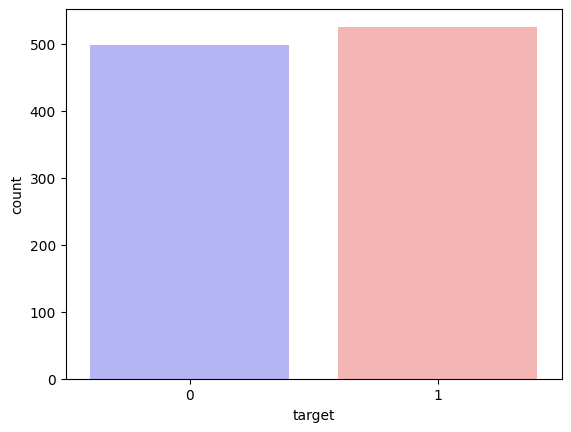

In [8]:
sns.countplot(x="target", data=df, palette="bwr")

In [9]:
correlation = df.corr()
print(correlation['target'].sort_values(ascending=False))

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


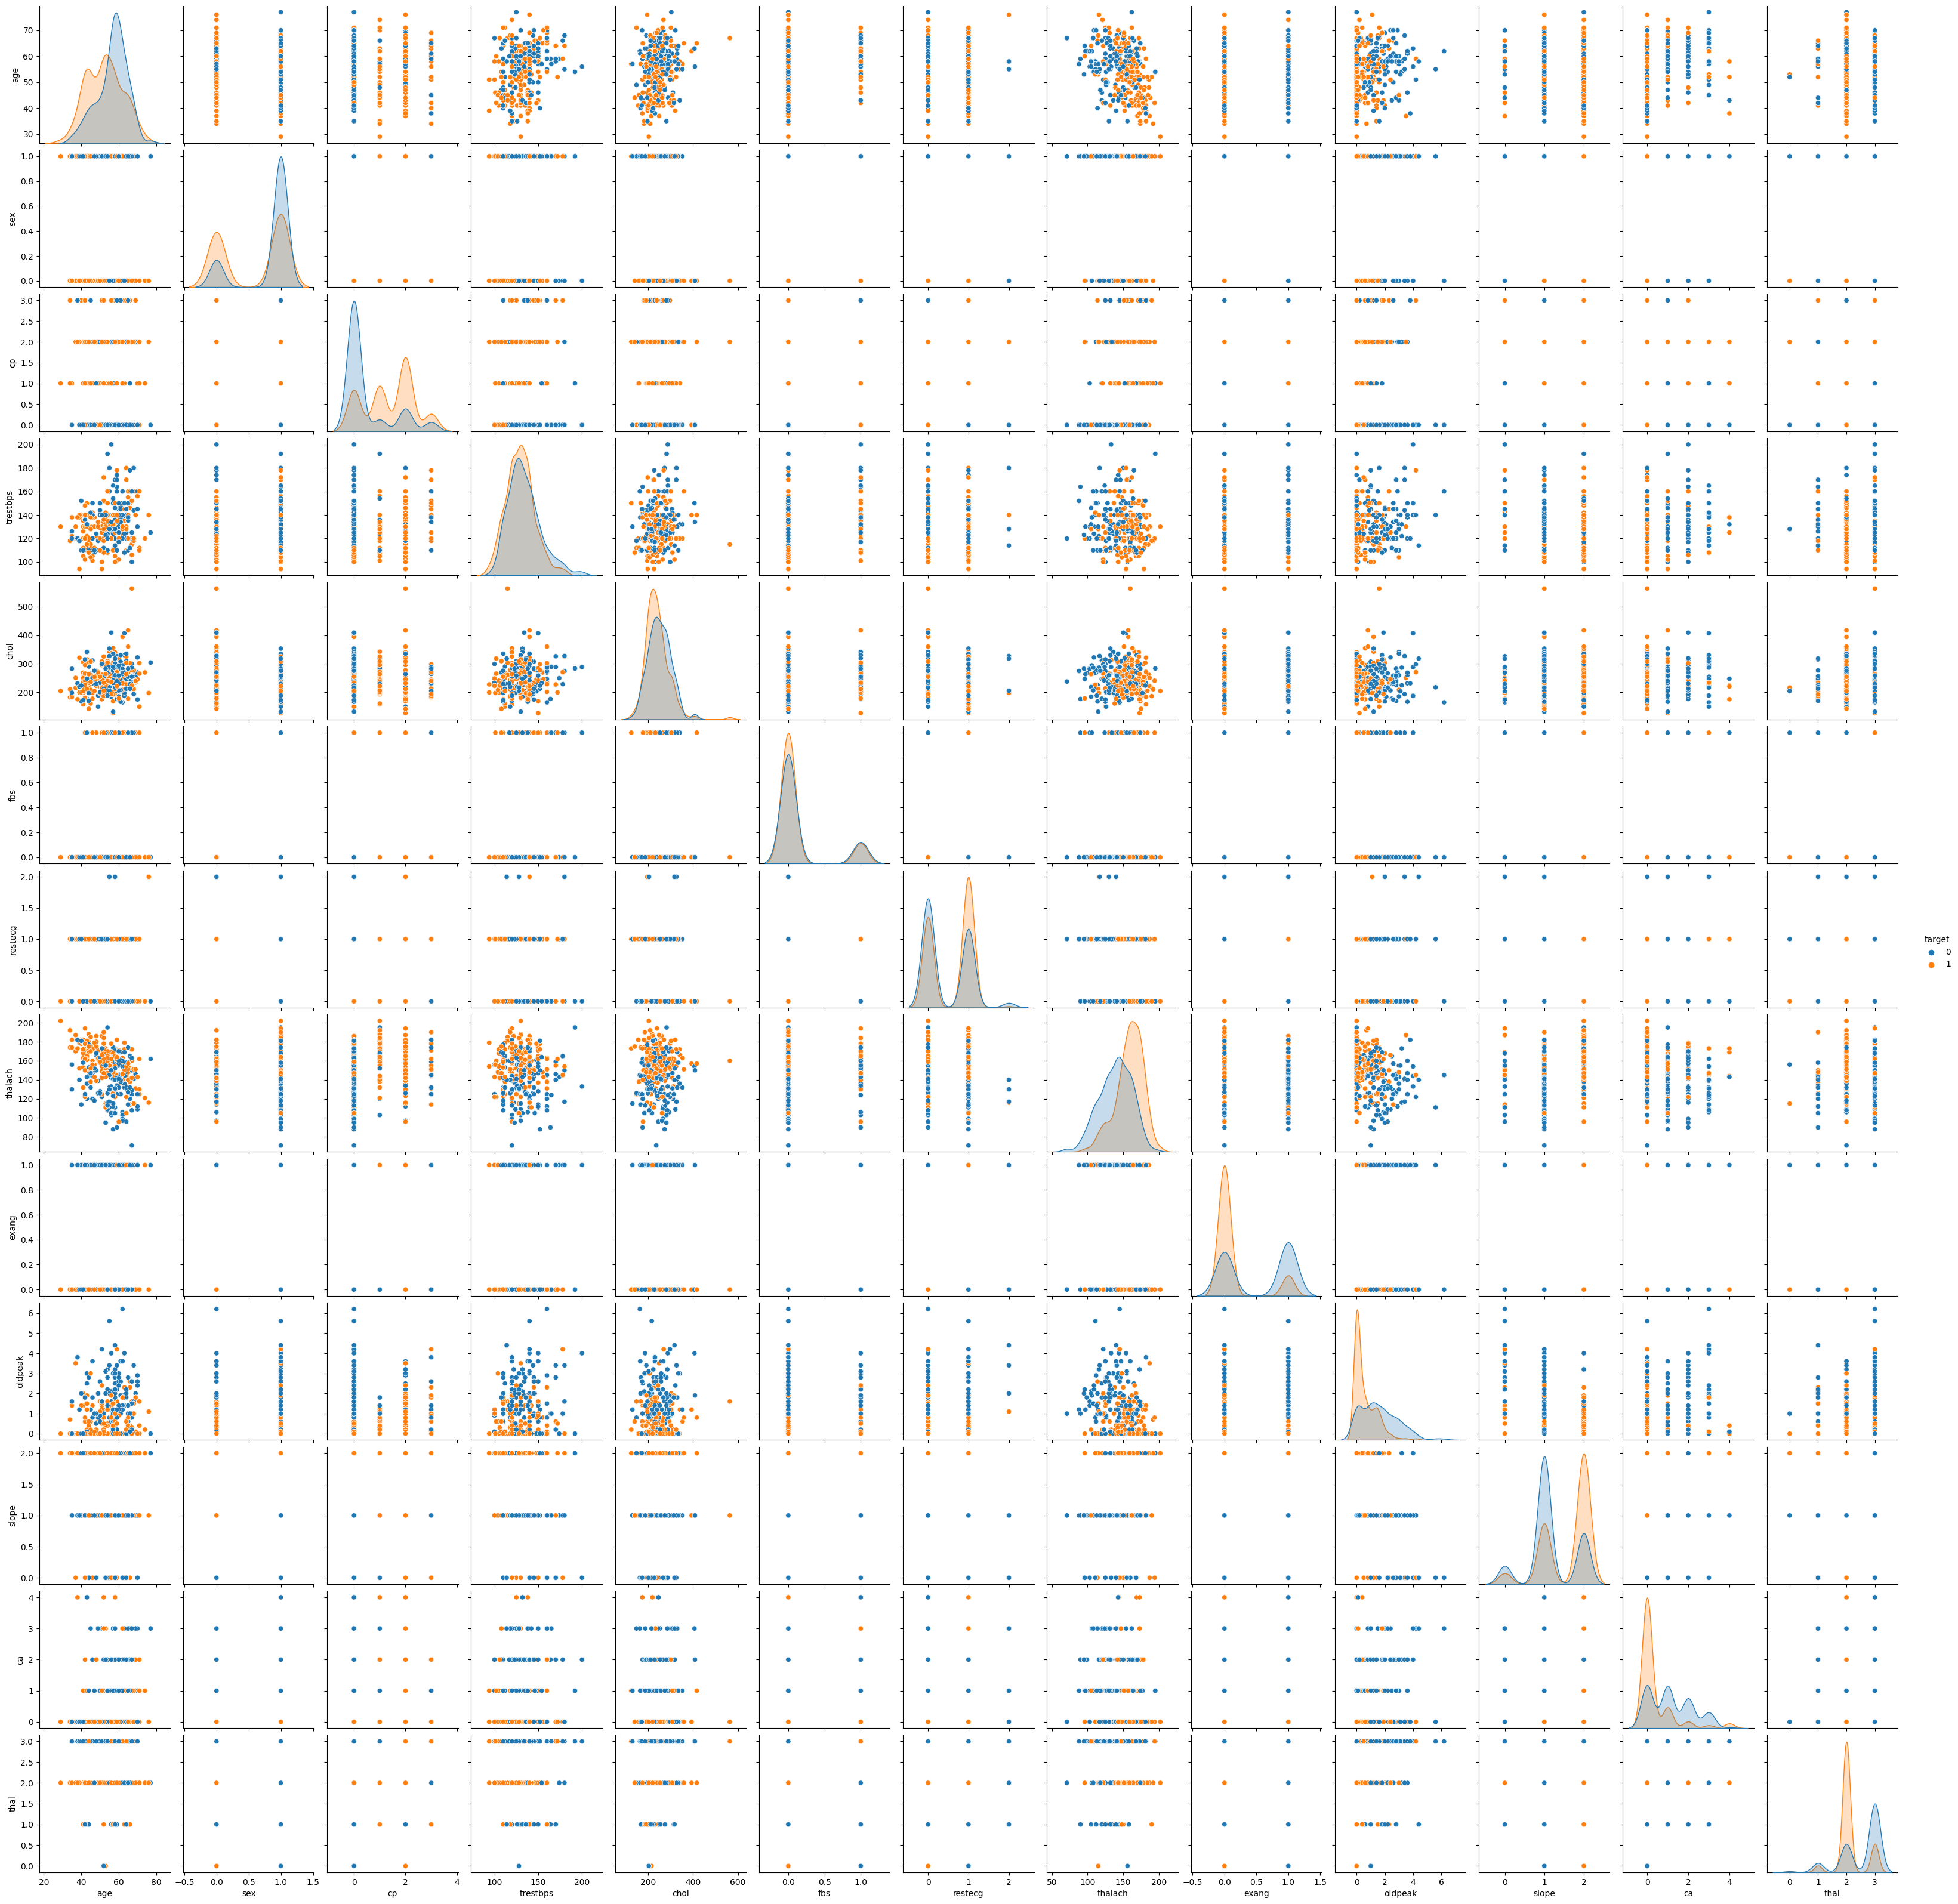

In [10]:
sns.pairplot(df, hue="target")

In [11]:
cdf= df[['cp','thalach','exang','oldpeak','slope','ca','thal','target']]
cdf.head(5)

,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,0,168,0,1.0,2,2,3,0
1,0,155,1,3.1,0,0,3,0
2,0,125,1,2.6,0,0,3,0
3,0,161,0,0.0,2,1,3,0
4,0,106,0,1.9,1,3,2,0


In [12]:
correlation= cdf.corr()
print(correlation['target'].sort_values(ascending=False))

target     1.000000
cp         0.434854
thalach    0.422895
slope      0.345512
thal      -0.337838
ca        -0.382085
exang     -0.438029
oldpeak   -0.438441
Name: target, dtype: float64


In [13]:
x = np.asarray(cdf[['cp','thalach','exang','oldpeak','slope','ca','thal']])
y= np.asarray(cdf['target'])
x[:5]

array([[  0. , 168. ,   0. ,   1. ,   2. ,   2. ,   3. ],
       [  0. , 155. ,   1. ,   3.1,   0. ,   0. ,   3. ],
       [  0. , 125. ,   1. ,   2.6,   0. ,   0. ,   3. ],
       [  0. , 161. ,   0. ,   0. ,   2. ,   1. ,   3. ],
       [  0. , 106. ,   0. ,   1.9,   1. ,   3. ,   2. ]])

In [14]:
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [15]:
#normalize x
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
x[:5]

array([[-0.91575542,  0.82132052, -0.71228712, -0.06088839,  0.99543334,
         1.20922066,  1.08985168],
       [-0.91575542,  0.2559679 ,  1.40392824,  1.72713707, -2.24367514,
        -0.73197147,  1.08985168],
       [-0.91575542, -1.04869198,  1.40392824,  1.30141672, -2.24367514,
        -0.73197147,  1.08985168],
       [-0.91575542,  0.51689988, -0.71228712, -0.91232909,  0.99543334,
         0.23862459,  1.08985168],
       [-0.91575542, -1.87497657, -0.71228712,  0.70540823, -0.6241209 ,
         2.17981673, -0.52212231]])

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.4, solver='liblinear').fit(x_train,y_train)

yhat = LR.predict(x_test)



In [18]:
acc = LR.score(x_test, y_test)
print(acc)

0.8146341463414634


In [19]:
yhat[:5]

array([1, 1, 0, 0, 1], dtype=int64)

In [20]:
#get probability prediction of y
yhat_prob = LR.predict_proba(x_test)
yhat_prob[:5]


array([[0.25390543, 0.74609457],
       [0.11764889, 0.88235111],
       [0.6591824 , 0.3408176 ],
       [0.88146135, 0.11853865],
       [0.38745302, 0.61254698]])

In [22]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhat)
print(confusion_matrix)

[[80 27]
 [11 87]]
